<a href="https://colab.research.google.com/github/guillermohenrion/DataAnalytics/blob/master/Covi_19_comparaci%C3%B3n_entre_paises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Covid-19: comparación entre paises 

Datos actualizados a diario tomados desde: [CSSEGISandData / COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)




In [ ]:
# Recupero los datos
!rm time_series_covid19_confirmed_global.csv
!rm time_series_covid19_deaths_global.csv
!rm time_series_covid19_recovered_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
#from google.colab import files
#uploaded=files.upload()

--2020-06-27 23:49:34--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155387 (152K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 151.75K  --.-KB/s    in 0.02s   

2020-06-27 23:49:34 (5.94 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [155387/155387]

--2020-06-27 23:49:35--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133

In [ ]:
# Leo, saco columnas no necesarias para el análisis, agrupo por país
import pandas as pd

df_covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_covid_g = df_covid
df_covid=df_covid.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid=df_covid.groupby('Country/Region').sum()
df_covid.head()
df_covid_g


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,246,251,251,251,251,251,251,299,441,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,167,184,197,209,212,222,233,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,34,34,78,78,87,87,87,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747


In [ ]:
df_covid.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,...,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02
mean,2.952128,3.478723,5.005319,7.627660,11.265957,15.569149,29.670213,32.797872,43.797872,52.803191,64.031915,89.292553,105.750000,127.085106,146.994681,163.797872,182.930851,197.446809,213.563830,227.457447,238.308511,240.537234,321.106383,355.771277,367.180851,378.851064,389.670213,399.659574,402.335106,405.303191,408.611702,417.936170,419.989362,423.005319,427.510638,432.691489,439.914894,447.180851,457.271277,469.813830,...,2.558678e+04,2.609677e+04,2.662639e+04,2.719344e+04,2.776907e+04,2.830331e+04,2.881571e+04,2.927832e+04,2.978306e+04,3.033039e+04,3.095879e+04,3.160605e+04,3.229194e+04,3.286628e+04,3.337897e+04,3.397792e+04,3.467640e+04,3.533432e+04,3.604322e+04,3.671622e+04,3.731776e+04,3.786891e+04,3.852496e+04,3.923581e+04,3.997194e+04,4.066096e+04,4.137703e+04,4.208737e+04,4.273649e+04,4.347840e+04,4.441463e+04,4.515413e+04,4.611874e+04,4.696376e+04,4.766280e+04,4.839704e+04,4.927625e+04,5.016676e+04,5.111611e+04,5.213602e+04
std,39.964996,46.892465,67.092123,102.534719,151.321394,209.810050,401.761253,443.912420,593.710369,714.840028,867.187925,1212.810117,1437.876285,1728.942523,2001.195548,2230.709436,2487.625572,2684.825551,2904.711491,3088.844154,3237.039248,3264.235285,4368.130248,4839.479508,4989.338526,5142.482804,5282.580954,5412.183706,5441.947989,5475.324000,5509.777247,5615.551344,5617.070153,5633.075315,5670.503344,5700.684474,5732.797095,5757.584311,5790.554029,5834.638378,...,1.190307e+05,1.207961e+05,1.227762e+05,1.249143e+05,1.270154e+05,1.289126e+05,1.307235e+05,1.323517e+05,1.340772e+05,1.358231e+05,1.380044e+05,1.403062e+05,1.427288e+05,1.446145e+05,1.462074e+05,1.483363e+05,1.504937e+05,1.527544e+05,1.553076e+05,1.576363e+05,1.594931e+05,1.612318e+05,1.634093e+05,1.658107e+05,1.683223e+05,1.708683e+05,1.733678e+05,1.754231e+05,1.775142e+05,1.802341e+05,1.831746e+05,1.858743e+05,1.897078e+05,1.930777e+05,1.955290e+05,1.984343e+05,2.021070e+05,2.058763e+05,2.098909e+05,2.144759e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+0

[]

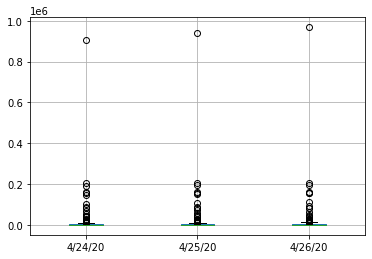

In [ ]:
df_covid.boxplot(column=['4/24/20'	,'4/25/20'	,'4/26/20']).plot()

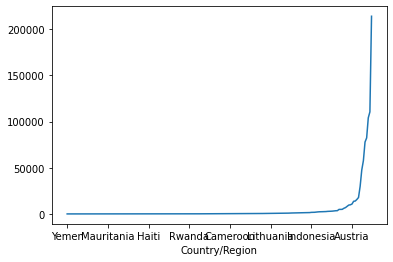

In [ ]:
dfs=df_covid.sort_values(by=df_covid.columns[70])
dfs[df_covid.columns[70]].plot()


In [ ]:
#Traspongo 
df_covid_t=df_covid.transpose()
df_covid_t.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0


count      157.000000
mean      7684.318471
std      12558.587429
min          0.000000
25%          0.000000
50%       1795.000000
75%       8371.000000
max      55343.000000
Name: Argentina, dtype: float64

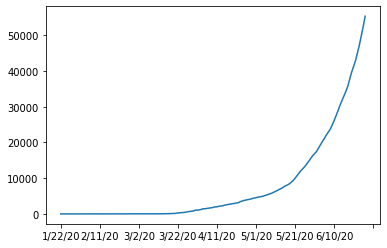

In [ ]:
df_covid_t['Argentina'].plot()

pd.DataFrame(df_covid_t['Argentina']).describe()
df_covid_t['Argentina'].describe()

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/22/20    44931
6/23/20    47203
6/24/20    49851
6/25/20    52457
6/26/20    55343
Name: Argentina, Length: 157, dtype: int64

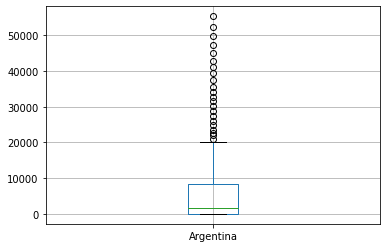

In [ ]:
pd.DataFrame(df_covid_t['Argentina']).boxplot(column='Argentina').plot()
pd.DataFrame(df_covid_t['Argentina'])
df_covid_t['Argentina']


In [ ]:
# Tomo data desde t0 para algunos paies
#df_covid_t0.head()
df_covid_t0=df_covid_t[1:]
df_covid_t0
df_covid_t0_Argentina=df_covid_t0["Argentina"]
df_covid_t0_Argentina=df_covid_t0_Argentina[df_covid_t0_Argentina>0]
df_covid_t0_Argentina
df_covid_t0_Italia=df_covid_t0["Italy"]
df_covid_t0_Italia=df_covid_t0_Italia[df_covid_t0_Italia>0]

df_covid_t0_Chile=df_covid_t0["Chile"]
df_covid_t0_Chile=df_covid_t0_Chile[df_covid_t0_Chile>0]

df_covid_t0_Australia=df_covid_t0["Australia"]
df_covid_t0_Australia=df_covid_t0_Chile[df_covid_t0_Australia>0]

df_covid_t0_Spain=df_covid_t0["Spain"]
df_covid_t0_Spain=df_covid_t0_Spain[df_covid_t0_Spain>0]

df_covid_t0_Argentina.head()

3/3/20    1
3/4/20    1
3/5/20    1
3/6/20    2
3/7/20    8
Name: Argentina, dtype: int64

In [ ]:
#Con Plotly
import plotly.express as px

cntArgentina=df_covid_t0_Argentina.count()
colA=['Argentina']*cntArgentina
colA
df_covid_t0_Argentina2=pd.DataFrame(df_covid_t0_Argentina)
df_covid_t0_Argentina2.insert(1, "Pais", colA, True)
df_covid_t0_Argentina2
cntChile=df_covid_t0_Chile.count()
colC=['Chile']*cntChile
df_covid_t0_Chile2=pd.DataFrame(df_covid_t0_Chile)
df_covid_t0_Chile2.insert(1, "Pais", colC, True)

cntItalia=df_covid_t0_Italia.count()
colI=['Italia']*cntItalia
df_covid_t0_Italia2=pd.DataFrame(df_covid_t0_Italia)
df_covid_t0_Italia2.insert(1, "Pais", colI, True)

cntSpain=df_covid_t0_Spain.count()
colS=['España']*cntSpain
df_covid_t0_Spain2=pd.DataFrame(df_covid_t0_Spain)
df_covid_t0_Spain2.insert(1, "Pais", colS, True)

df_covid_t0_Argentina2.columns=['Confirmados', 'Pais']
df_covid_t0_Chile2.columns=['Confirmados', 'Pais']
df_covid_t0_Italia2.columns=['Confirmados', 'Pais']
df_covid_t0_Spain2.columns=['Confirmados', 'Pais']

df2=pd.concat([
    df_covid_t0_Argentina2,df_covid_t0_Chile2, df_covid_t0_Italia2, df_covid_t0_Spain2
],ignore_index=True).drop_duplicates().reset_index(drop=True)
df2
fig = px.line(df2,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [ ]:
#Forma genérica
 
dfg=pd.DataFrame()
df_covid_t0_p={}
cp = ['Argentina', 'Chile', 'Spain', 'Italy', 'China', 'Brazil', 'US', 'Australia', 'Peru', 'Bolivia', 'Paraguay', 'Uruguay','Ecuador']
#for c in df_covid_t.columns: # Selecciono algunos, porque con todos no se entiende el gráfico
for c in cp:
  dfp=df_covid_t0[c]
  dfp=dfp[dfp>0]
  cnp=dfp.count()
  colp=[c]*cnp
  dfp2=pd.DataFrame(dfp)
  dfp2.insert(1, "Pais", colp, True)
  dfp2.columns=['Confirmados', 'Pais']
  dfg=pd.concat([dfg ,dfp2],ignore_index=True).drop_duplicates().reset_index(drop=True)
 
fig = px.line(dfg,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [ ]:
#Confirmados a la fecha
df_covid_g.head()
c=df_covid_g.columns
l=len(c)
dfc=df_covid_g.drop(c[4:l-1], axis=1)
dfc.head()
dfc.columns=['Province/State'	,'Country/Region'	,'Lat'	,'Long','Confirmados']
dfc.head()


,Province/State,Country/Region,Lat,Long,Confirmados
0,NaN,Afghanistan,33.0000,65.0000,30451
1,NaN,Albania,41.1533,20.1683,2269
2,NaN,Algeria,28.0339,1.6596,12685
3,NaN,Andorra,42.5063,1.5218,855
4,NaN,Angola,-11.2027,17.8739,212


In [ ]:
#Idem anterior para recuperados y muetos
import pandas as pd
import plotly.express as px

df_covid_c = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_covid_c = df_covid_c.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid_c = df_covid_c.groupby('Country/Region').sum()
df_covid_c_t = df_covid_c.transpose()
df_covid_c_t_Argentina=df_covid_c_t['Argentina']

cntArgentina=df_covid_c_t_Argentina.count()
colA=['Confirmados']*cntArgentina
df_covid_c_t_Argentina=pd.DataFrame(df_covid_c_t_Argentina)
df_covid_c_t_Argentina.insert(1, "Estado", colA, True)

df_covid_d = pd.read_csv('time_series_covid19_deaths_global.csv')
df_covid_d=df_covid_d.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid_d=df_covid_d.groupby('Country/Region').sum()
df_covid_d_t=df_covid_d.transpose()
df_covid_d_t_Argentina=df_covid_d_t['Argentina']

cntArgentina=df_covid_d_t_Argentina.count()
colA=['Muertos']*cntArgentina
df_covid_d_t_Argentina=pd.DataFrame(df_covid_d_t_Argentina)
df_covid_d_t_Argentina.insert(1, "Estado", colA, True)
df_covid_r = pd.read_csv('time_series_covid19_recovered_global.csv')
df_covid_r=df_covid_r.drop(['Province/State',	'Lat',	'Long'], axis=1)
df_covid_r=df_covid_r.groupby('Country/Region').sum()
df_covid_r_t=df_covid_r.transpose()
df_covid_r_t_Argentina=df_covid_r_t['Argentina']

cntArgentina=df_covid_r_t_Argentina.count()
colA=['Confirmados-Recuperados']*cntArgentina
df_covid_r_t_Argentina=pd.DataFrame(df_covid_r_t_Argentina)
df_covid_r_t_Argentina.insert(1, "Estado", colA, True)

df_covid_r_t_Argentina['Argentina'] = df_covid_c_t_Argentina['Argentina']-df_covid_r_t_Argentina['Argentina']

df3=pd.concat([
    df_covid_r_t_Argentina, df_covid_d_t_Argentina, df_covid_c_t_Argentina
])

df3=df3[df3.index>='3/1/20']
df3.columns=['Casos','Estado']
df3.index.name='Fecha'

fig = px.line(df3,  y="Casos", color='Estado', x=df3.index, title="Casos Argentina")
fig.show()



In [ ]:
from geopy.geocoders import Nominatim
import folium
import base64
import io

mapa = folium.Map(location=(-34.6131516,	 -58.3772316), zoom_start=4)
for index,row in dfc.iterrows(): 
  icon_url = 'https://upload.wikimedia.org/wikipedia/commons/9/9e/WX_circle_red.png'

  icon = folium.features.CustomIcon(icon_url,icon_size=(max(row['Confirmados']/10000,5), max(row['Confirmados']/10000, 5)))  # Creating a custom Icon

  folium.Marker(location=(row['Lat'],row['Long']),  icon=icon, tooltip=row['Confirmados']).add_to(mapa)

display(mapa)


[herokuapp](https://covid-19-raffg.herokuapp.com/)

[Predictive Monitoring of COVID-19](https://ddi.sutd.edu.sg/)